In [74]:
load('GeneratePosets.sage')
load('Read.sage')

In [62]:
X8 = AllPosets(8)
BadPosetsIn8 = list(set(X8)-set(ReadPosets(8)))

In [75]:
def GoodFromBad(badposet):
    m = badposet.cardinality()
    X= ReadPosets(m)
    return EliminateRedun([x for x in X if (all(y in x.relations() for y in badposet.relations()))])

def EliminateRedun(Goods):
    Red = []
    for i in range(0,len(Goods)):
        for j in range(1,len(Goods)):
            if j !=i:
                if [x for x in Goods[i].relations() if x in Goods[j].relations()] == Goods[i].relations():
                    Red.append(j)
    El = [Goods[i] for i in range (0,len(Goods)) if i not in Red]
    return El
    

In [65]:
Goods = [GoodFromBad(x) for x in BadPosetsIn8]

In [66]:
G = []
for i in Goods:
    G=G+i
gg = list(set(G))

In [69]:
path = os.getcwd()
dir=os.path.join(path, 'good-from-bad')
os.mkdir(dir)
os.chdir(dir)

In [70]:

for i in range(len(gg)):
        newdir=os.path.join(dir, str(i)+'bad' )
        os.mkdir(newdir)
        os.chdir(newdir)
        X= [x for x in BadPosetsIn8 if gg[i] in GoodFromBad(x) ]
        for j in range(len(X)):
            X[j].plot().save(str(j)+'.png')
        gg[i].plot().save('corresponding-good.png')
        os.chdir(dir)

In [5]:
def Diamond(Poset):
    for a in Poset:
        for b in Poset:
            ab = mod(a+b, Poset.cardinality())
            if Poset.is_lequal(a,ab):
                for c in Poset:
                    abc = mod(a+b+c, Poset.cardinality())
                    ac = mod(a+c, Poset.cardinality())
                    if Poset.is_lequal(ab, abc) and ((Poset.is_lequal(a, ac)== False) or(Poset.is_lequal(ac, abc)) ==False ):

                        return False
    return True


In [76]:
def ArrayToPoset(Arr):
    El = list(set([x[0] for x in Arr[0]]+[x[1] for x in Arr[0]]))
    P = [Poset([El, Rel]) for Rel in Arr]
    return P


import numpy as np
P9 = np.load('/home/nayan/Downloads/sage-9.3/m9_Posets/m9_All.npy', allow_pickle = True)
load('Read.sage')
load('GeneratePosets.sage')
Posets9 = ArrayToPoset(P9)


In [88]:
Rel = [[1,3],[2,3],[8,6],[7,6]]+[[0,x] for x in [0..8]]

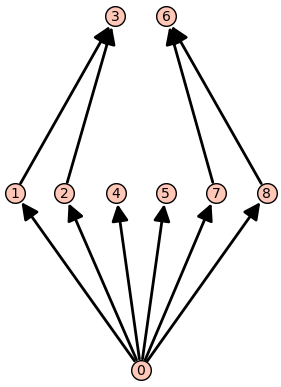

True

In [89]:
P = Poset([[0..8], Rel])
P.show()
P in ReadPosets(9)

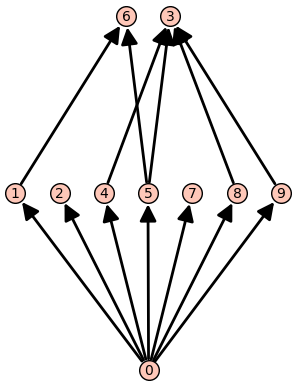

In [82]:
GoodFromBad(P)[0].show()

In [90]:

P9=ReadPosets(9)

In [98]:
P9F=ReadPosets(9,9-2)
P9R = ReadPosets(9,9-3)

In [95]:
facetrel=[]
for p in P9F:
    rel = p.relations()
    fac = [x for x in rel if x[0]!=0 and x[0]!=x[1]]
    facetrel.append(fac)

In [103]:
nonridge = []
for x in Combin(facetrel,2):
    
    Rel = [[0,x] for x in [0..8]]+x[0]+x[1]
    print(x[0], x[1])
    Q = Poset([[0..8], Rel])
    if Q not in P9R:
        nonridge.append(x)

[[5, 1]] [[4, 1], [6, 1]]
[[5, 1]] [[3, 1], [7, 1]]
[[5, 1]] [[2, 1], [8, 1]]
[[5, 1]] [[5, 2], [6, 2]]
[[5, 1]] [[4, 2], [7, 2]]
[[5, 1]] [[3, 2], [8, 2]]
[[5, 1]] [[6, 3]]
[[5, 1]] [[5, 3], [7, 3]]
[[5, 1]] [[4, 3], [8, 3]]
[[5, 1]] [[6, 4], [7, 4]]
[[5, 1]] [[5, 4], [8, 4]]
[[5, 1]] [[7, 5]]
[[5, 1]] [[6, 5], [8, 5]]
[[5, 1]] [[7, 6], [8, 6]]
[[5, 1]] [[8, 7]]
[[5, 1]] [[4, 8]]
[[5, 1]] [[3, 8], [5, 8]]
[[5, 1]] [[3, 7], [4, 7]]
[[5, 1]] [[3, 6]]
[[5, 1]] [[2, 8], [6, 8]]
[[5, 1]] [[2, 7], [5, 7]]
[[5, 1]] [[2, 6], [4, 6]]
[[5, 1]] [[2, 5], [3, 5]]
[[5, 1]] [[2, 4]]
[[5, 1]] [[1, 8], [7, 8]]
[[5, 1]] [[1, 7], [6, 7]]
[[5, 1]] [[1, 6], [5, 6]]
[[5, 1]] [[1, 5], [4, 5]]


ValueError: The graph is not directed acyclic

In [97]:
facetrel[0]

[[5, 1]]

In [101]:
facetrel

[[[5, 1]],
 [[4, 1], [6, 1]],
 [[3, 1], [7, 1]],
 [[2, 1], [8, 1]],
 [[5, 2], [6, 2]],
 [[4, 2], [7, 2]],
 [[3, 2], [8, 2]],
 [[6, 3]],
 [[5, 3], [7, 3]],
 [[4, 3], [8, 3]],
 [[6, 4], [7, 4]],
 [[5, 4], [8, 4]],
 [[7, 5]],
 [[6, 5], [8, 5]],
 [[7, 6], [8, 6]],
 [[8, 7]],
 [[4, 8]],
 [[3, 8], [5, 8]],
 [[3, 7], [4, 7]],
 [[3, 6]],
 [[2, 8], [6, 8]],
 [[2, 7], [5, 7]],
 [[2, 6], [4, 6]],
 [[2, 5], [3, 5]],
 [[2, 4]],
 [[1, 8], [7, 8]],
 [[1, 7], [6, 7]],
 [[1, 6], [5, 6]],
 [[1, 5], [4, 5]],
 [[1, 4], [3, 4]],
 [[1, 3], [2, 3]],
 [[1, 2]]]